In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D  

In [106]:
#constants
nx = 20
ny = 20
nt = 100
dx = 2 / nx
dy = 2 / ny
xs = np.linspace(0, 2, nx)
ys = np.linspace(0, 2, ny)
X, Y = np.meshgrid(xs, ys)
F = 1 

rho = 1
nu =0.2
dt = 0.01

#init 
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

In [127]:
#poisson equation and BC for pressure

def create_B(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b

def pressure_poisson(p, dx, dy, b):
    p0 = p.copy()
    
    for _ in range(100):
        p0 = p.copy()
        p[1:-1, 1:-1] = (((p0[1:-1, 2:] + p0[1:-1, 0:-2]) * dy**2 + 
                          (p0[2:, 1:-1] + p0[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[-1, nx -int(nx/6):] = 0
        p[-1,:nx - int(nx/6)]  = p[-2,:nx - int(nx/6)]
        p[:,0]  = p[:,1]
        p[:, -1] = p[:, -2] 
        p[0,:] = p[1,:]  
        
    return p


In [130]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    b = np.zeros((ny, nx))    
    for n in range(nt):
        u0 = u.copy()
        v0 = v.copy()
        
        b = create_B(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (u0[1:-1, 1:-1]-
                         u0[1:-1, 1:-1] * dt / dx *
                        (u0[1:-1, 1:-1] - u0[1:-1, 0:-2]) -
                         v0[1:-1, 1:-1] * dt / dy *
                        (u0[1:-1, 1:-1] - u0[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (u0[1:-1, 2:] - 2 * u0[1:-1, 1:-1] + u0[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (u0[2:, 1:-1] - 2 * u0[1:-1, 1:-1] + u0[0:-2, 1:-1])))

        v[1:-1,1:-1] = (v0[1:-1, 1:-1] -
                        u0[1:-1, 1:-1] * dt / dx *
                       (v0[1:-1, 1:-1] - v0[1:-1, 0:-2]) -
                        v0[1:-1, 1:-1] * dt / dy *
                       (v0[1:-1, 1:-1] - v0[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (v0[1:-1, 2:] - 2 * v0[1:-1, 1:-1] + v0[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (v0[2:, 1:-1] - 2 * v0[1:-1, 1:-1] + v0[0:-2, 1:-1])))

        u[-1, :] = 0 
        u[0:int(ny/3),:int(nx/3)]  = 1
        u[:int(ny/3),-3:] = -1
        u[int(ny/3):, 0]  = 0
        u[int(ny/3):, -1] = 0

        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        
    return u, v, p
print(int(nx/6))

3


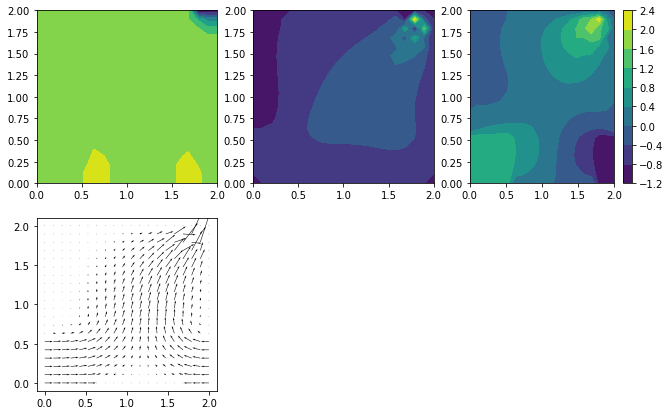

In [131]:
# init 
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))


u,v,p = cavity_flow(400, u, v, dt, dx, dy, p, rho, nu)




fig = plt.figure(figsize=(11,7))
plt.subplot(2,3,1)
plt.contourf(X, Y, p, cmap=cm.viridis)  
plt.subplot(2,3,2)
plt.contourf(X, Y, v, cmap=cm.viridis) 
plt.subplot(2,3,3)
plt.contourf(X, Y, u, cmap=cm.viridis)
plt.colorbar()
plt.subplot(2,3,4)
plt.quiver(X, Y, u, v)

plt.show()


<ipython-input-135-b6fd1bd1bd97>:11: UserWarning: No contour levels were found within the data range.
  cr = ax.contour(X,Y,p, cmap=cm.viridis)
MovieWriter ffmpeg unavailable; using Pillow instead.
<ipython-input-135-b6fd1bd1bd97>:21: UserWarning: No contour levels were found within the data range.
  cc = ax.contour(X,Y,p, cmap=cm.viridis)
<ipython-input-135-b6fd1bd1bd97>:68: UserWarning: No contour levels were found within the data range.
  cc = ax.contour(X,Y,p, cmap=cm.viridis)


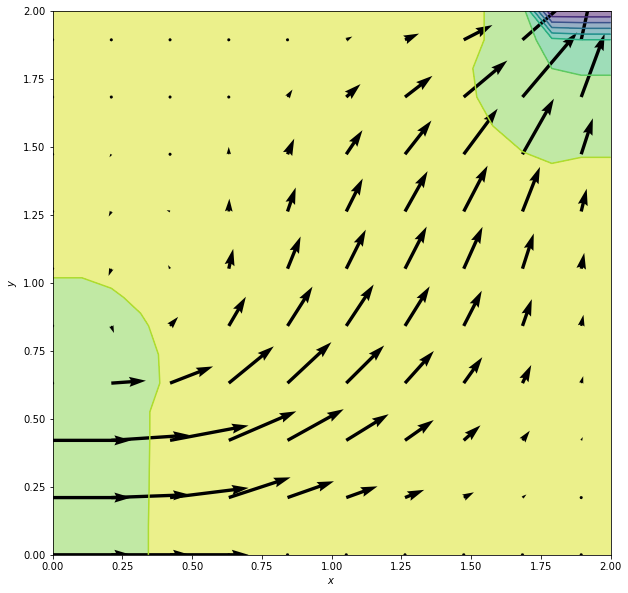

In [135]:
# animate 
#init
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
cf = ax.contourf(X,Y,p,alpha= 0.5, cmap=cm.viridis)
cr = ax.contour(X,Y,p, cmap=cm.viridis)
skip = 2
cq = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


def init():
    ax.clear()
    cf = ax.contourf(X,Y,p,alpha= 0.5, cmap=cm.viridis)
    cc = ax.contour(X,Y,p, cmap=cm.viridis)
    cq = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip])
    return cf,cc,cq

def animate(frames,b,p,u,v):
    u0 = u.copy()
    v0 = v.copy()
        
    b = create_B(b, rho, dt, u, v, dx, dy)
    p = pressure_poisson(p, dx, dy, b)
        
    u[1:-1, 1:-1] = (u0[1:-1, 1:-1]-
                     u0[1:-1, 1:-1] * dt / dx *
                    (u0[1:-1, 1:-1] - u0[1:-1, 0:-2]) -
                     v0[1:-1, 1:-1] * dt / dy *
                    (u0[1:-1, 1:-1] - u0[0:-2, 1:-1]) -
                     dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                     nu * (dt / dx**2 *
                    (u0[1:-1, 2:] - 2 * u0[1:-1, 1:-1] + u0[1:-1, 0:-2]) +
                     dt / dy**2 *
                    (u0[2:, 1:-1] - 2 * u0[1:-1, 1:-1] + u0[0:-2, 1:-1])))

    v[1:-1,1:-1] = (v0[1:-1, 1:-1] -
                        u0[1:-1, 1:-1] * dt / dx *
                       (v0[1:-1, 1:-1] - v0[1:-1, 0:-2]) -
                        v0[1:-1, 1:-1] * dt / dy *
                       (v0[1:-1, 1:-1] - v0[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (v0[1:-1, 2:] - 2 * v0[1:-1, 1:-1] + v0[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (v0[2:, 1:-1] - 2 * v0[1:-1, 1:-1] + v0[0:-2, 1:-1])))

    u[-1, :] = 0 
    u[0:int(ny/3),:int(nx/3)]  = 1
    u[int(ny/3):, 0]  = 0
    u[:,-1] = 0


    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0
        
        
    ax.clear()
    cf = ax.contourf(X,Y,p,alpha= 0.5, cmap=cm.viridis)
    cc = ax.contour(X,Y,p, cmap=cm.viridis)
    cq = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    return cf,cc,cq


anim = animation.FuncAnimation(fig, animate,init_func=init,fargs=(p,b,u,v),frames=100, repeat=False)
anim.save('CFD window-open.gif', fps = 20)


<ipython-input-136-2b52b871518f>:11: UserWarning: No contour levels were found within the data range.
  cr = ax.contour(X,Y,p, cmap=cm.viridis)
MovieWriter ffmpeg unavailable; using Pillow instead.
<ipython-input-136-2b52b871518f>:21: UserWarning: No contour levels were found within the data range.
  cc = ax.contour(X,Y,p, cmap=cm.viridis)
<ipython-input-136-2b52b871518f>:67: UserWarning: No contour levels were found within the data range.
  cc = ax.contour(X,Y,p, cmap=cm.viridis)


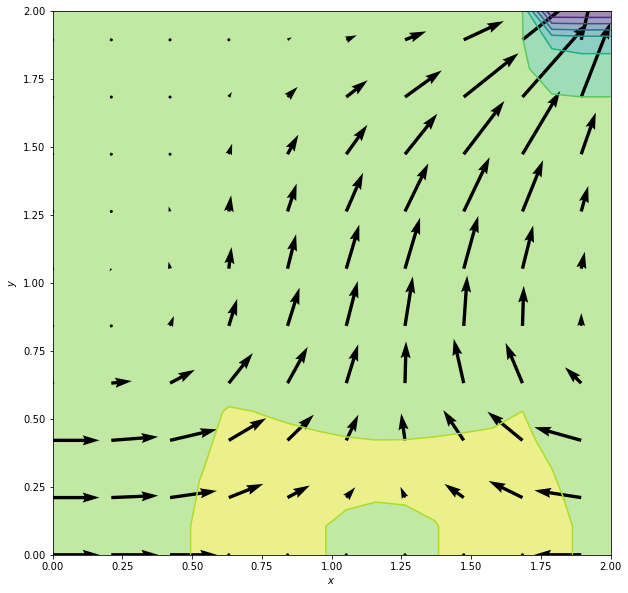

In [136]:
# animate 
#init
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
cf = ax.contourf(X,Y,p,alpha= 0.5, cmap=cm.viridis)
cr = ax.contour(X,Y,p, cmap=cm.viridis)
skip = 2
cq = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


def init():
    ax.clear()
    cf = ax.contourf(X,Y,p,alpha= 0.5, cmap=cm.viridis)
    cc = ax.contour(X,Y,p, cmap=cm.viridis)
    cq = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip])
    return cf,cc,cq

def animate(frames,b,p,u,v):
    u0 = u.copy()
    v0 = v.copy()
        
    b = create_B(b, rho, dt, u, v, dx, dy)
    p = pressure_poisson(p, dx, dy, b)
        
    u[1:-1, 1:-1] = (u0[1:-1, 1:-1]-
                         u0[1:-1, 1:-1] * dt / dx *
                        (u0[1:-1, 1:-1] - u0[1:-1, 0:-2]) -
                         v0[1:-1, 1:-1] * dt / dy *
                        (u0[1:-1, 1:-1] - u0[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (u0[1:-1, 2:] - 2 * u0[1:-1, 1:-1] + u0[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (u0[2:, 1:-1] - 2 * u0[1:-1, 1:-1] + u0[0:-2, 1:-1])))

    v[1:-1,1:-1] = (v0[1:-1, 1:-1] -
                        u0[1:-1, 1:-1] * dt / dx *
                       (v0[1:-1, 1:-1] - v0[1:-1, 0:-2]) -
                        v0[1:-1, 1:-1] * dt / dy *
                       (v0[1:-1, 1:-1] - v0[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (v0[1:-1, 2:] - 2 * v0[1:-1, 1:-1] + v0[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (v0[2:, 1:-1] - 2 * v0[1:-1, 1:-1] + v0[0:-2, 1:-1])))

    u[-1, :] = 0 
    u[0:int(ny/3),:int(nx/3)]  = 1
    u[:int(ny/3),-3:] = -1
    u[int(ny/3):, 0]  = 0
    u[int(ny/3):, -1] = 0

    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0
        
    ax.clear()
    cf = ax.contourf(X,Y,p,alpha= 0.5, cmap=cm.viridis)
    cc = ax.contour(X,Y,p, cmap=cm.viridis)
    cq = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    return cf,cc,cq


anim = animation.FuncAnimation(fig, animate,init_func=init,fargs=(p,b,u,v),frames=100, repeat=False)
anim.save('CFD window-open2.gif', fps = 20)

<ipython-input-137-9c0b6c353521>:31: UserWarning: No contour levels were found within the data range.
  cr = ax.contour(X,Y,p, cmap=cm.viridis)
MovieWriter ffmpeg unavailable; using Pillow instead.
<ipython-input-137-9c0b6c353521>:41: UserWarning: No contour levels were found within the data range.
  cc = ax.contour(X,Y,p, cmap=cm.viridis)
<ipython-input-137-9c0b6c353521>:87: UserWarning: No contour levels were found within the data range.
  cc = ax.contour(X,Y,p, cmap=cm.viridis)


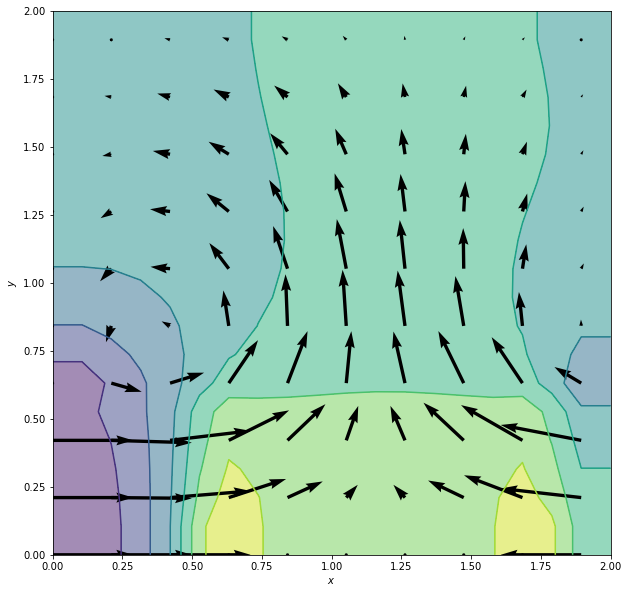

In [137]:
# animate 
def pressure_poisson2(p, dx, dy, b):
    p0 = p.copy()
    
    for _ in range(100):
        p0 = p.copy()
        p[1:-1, 1:-1] = (((p0[1:-1, 2:] + p0[1:-1, 0:-2]) * dy**2 + 
                          (p0[2:, 1:-1] + p0[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[-1,:] = p[-2,:] 
        p[:,0]  = p[:,1]
        p[:, -1] = p[:, -2] 
        p[0,:] = p[1,:]  
        
    return p



#init
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
cf = ax.contourf(X,Y,p,alpha= 0.5, cmap=cm.viridis)
cr = ax.contour(X,Y,p, cmap=cm.viridis)
skip = 2
cq = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


def init():
    ax.clear()
    cf = ax.contourf(X,Y,p,alpha= 0.5, cmap=cm.viridis)
    cc = ax.contour(X,Y,p, cmap=cm.viridis)
    cq = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip])
    return cf,cc,cq

def animate(frames,b,p,u,v):
    u0 = u.copy()
    v0 = v.copy()
        
    b = create_B(b, rho, dt, u, v, dx, dy)
    p = pressure_poisson2(p, dx, dy, b)
        
    u[1:-1, 1:-1] = (u0[1:-1, 1:-1]-
                         u0[1:-1, 1:-1] * dt / dx *
                        (u0[1:-1, 1:-1] - u0[1:-1, 0:-2]) -
                         v0[1:-1, 1:-1] * dt / dy *
                        (u0[1:-1, 1:-1] - u0[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (u0[1:-1, 2:] - 2 * u0[1:-1, 1:-1] + u0[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (u0[2:, 1:-1] - 2 * u0[1:-1, 1:-1] + u0[0:-2, 1:-1])))

    v[1:-1,1:-1] = (v0[1:-1, 1:-1] -
                        u0[1:-1, 1:-1] * dt / dx *
                       (v0[1:-1, 1:-1] - v0[1:-1, 0:-2]) -
                        v0[1:-1, 1:-1] * dt / dy *
                       (v0[1:-1, 1:-1] - v0[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (v0[1:-1, 2:] - 2 * v0[1:-1, 1:-1] + v0[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (v0[2:, 1:-1] - 2 * v0[1:-1, 1:-1] + v0[0:-2, 1:-1])))

    u[-1, :] = 0 
    u[0:int(ny/3),:int(nx/3)]  = 1
    u[:int(ny/3),-3:] = -1
    u[int(ny/3):, 0]  = 0
    u[int(ny/3):, -1] = 0

    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0
        
    ax.clear()
    cf = ax.contourf(X,Y,p,alpha= 0.5, cmap=cm.viridis)
    cc = ax.contour(X,Y,p, cmap=cm.viridis)
    cq = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    return cf,cc,cq


anim = animation.FuncAnimation(fig, animate,init_func=init,fargs=(p,b,u,v),frames=100, repeat=False)
anim.save('CFD window-close.gif', fps = 20)